### Importing the necessary libraries

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

### Reading the CSV file 

In [45]:
customer_data=pd.read_csv("Mall_Customers.csv")
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [47]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No null values in any Column

In [48]:
X=customer_data.drop(columns=['CustomerID', 'Gender', 'Age'],axis=1).values

Dropping useless columns

## Vizualing Data points

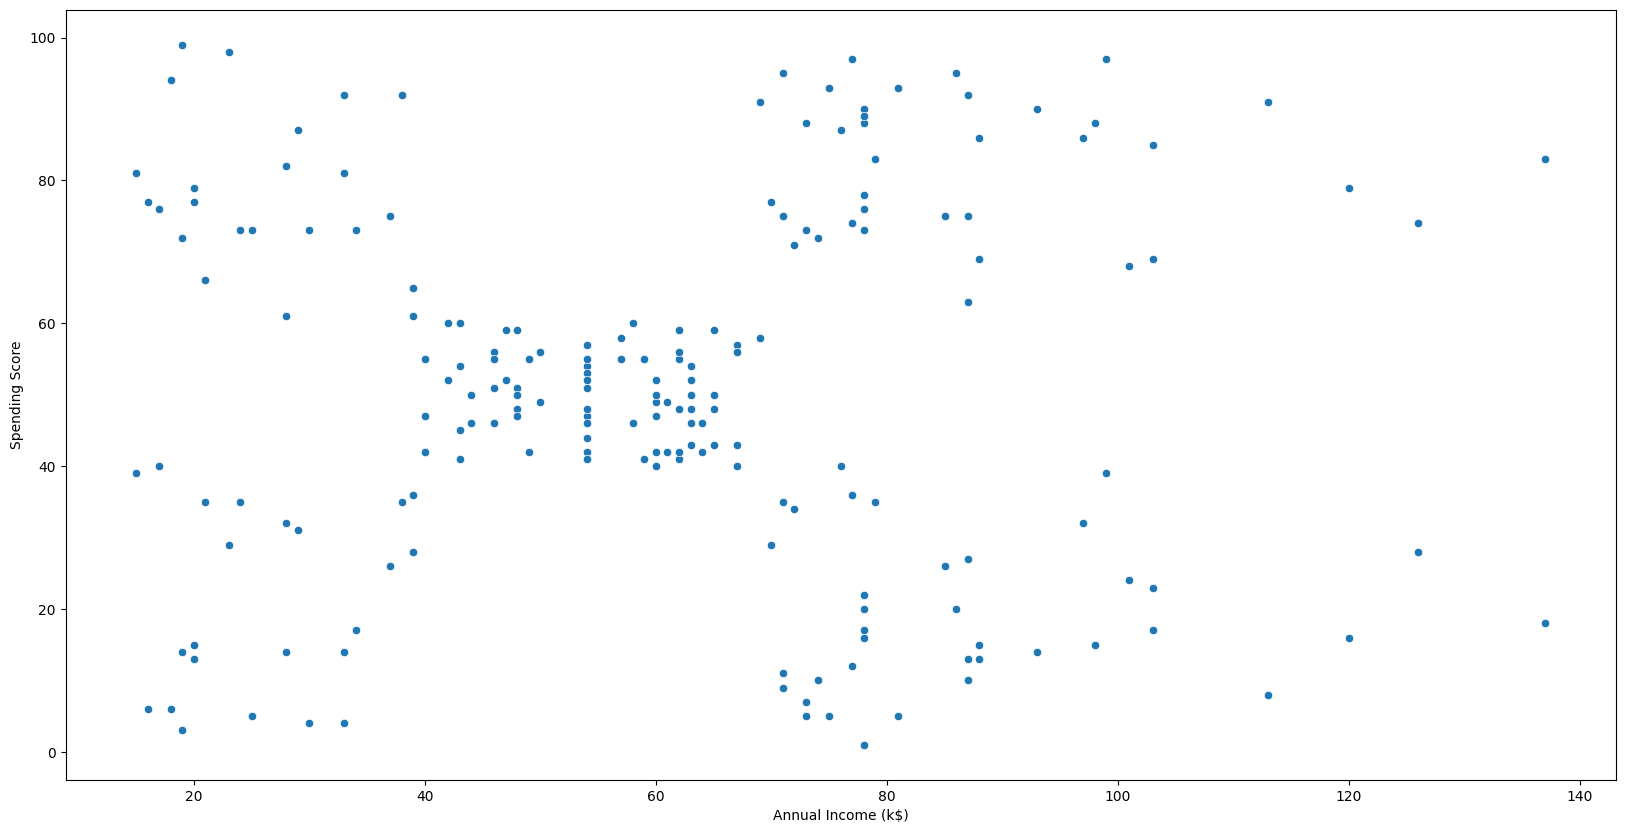

In [49]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

## Finding the k (No. of cluster) value using Elbow method 

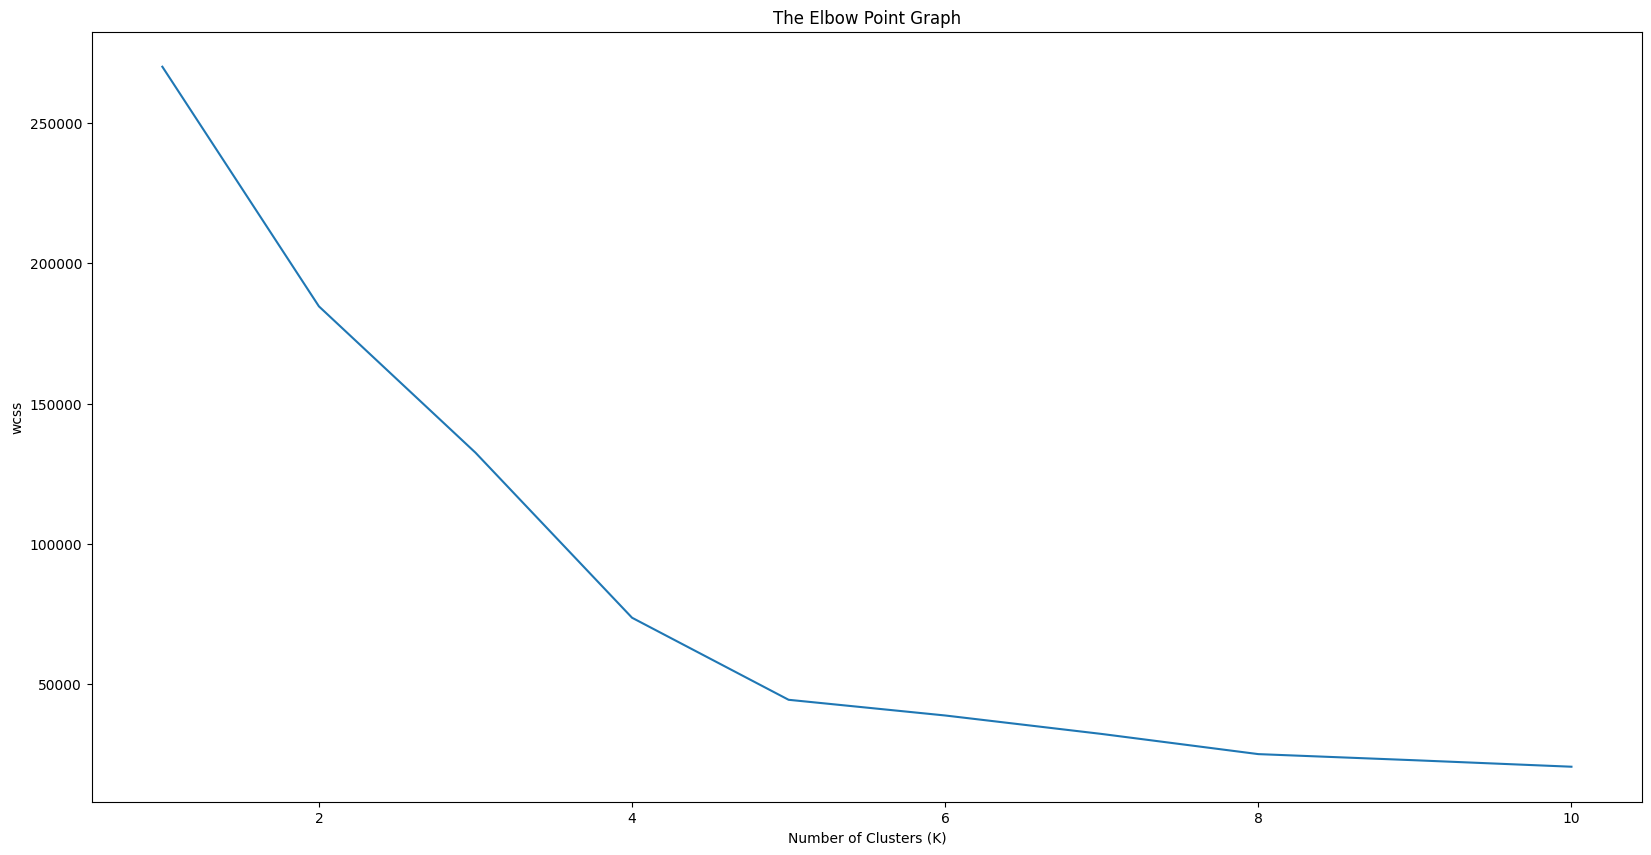

In [52]:
wcss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()

By this graph it is clear that we need to make 5 clusters

## Training the Kmeans algorithm using training dataset

In [53]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)

### Centroid points

In [54]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

## Visualizing the clusters formed

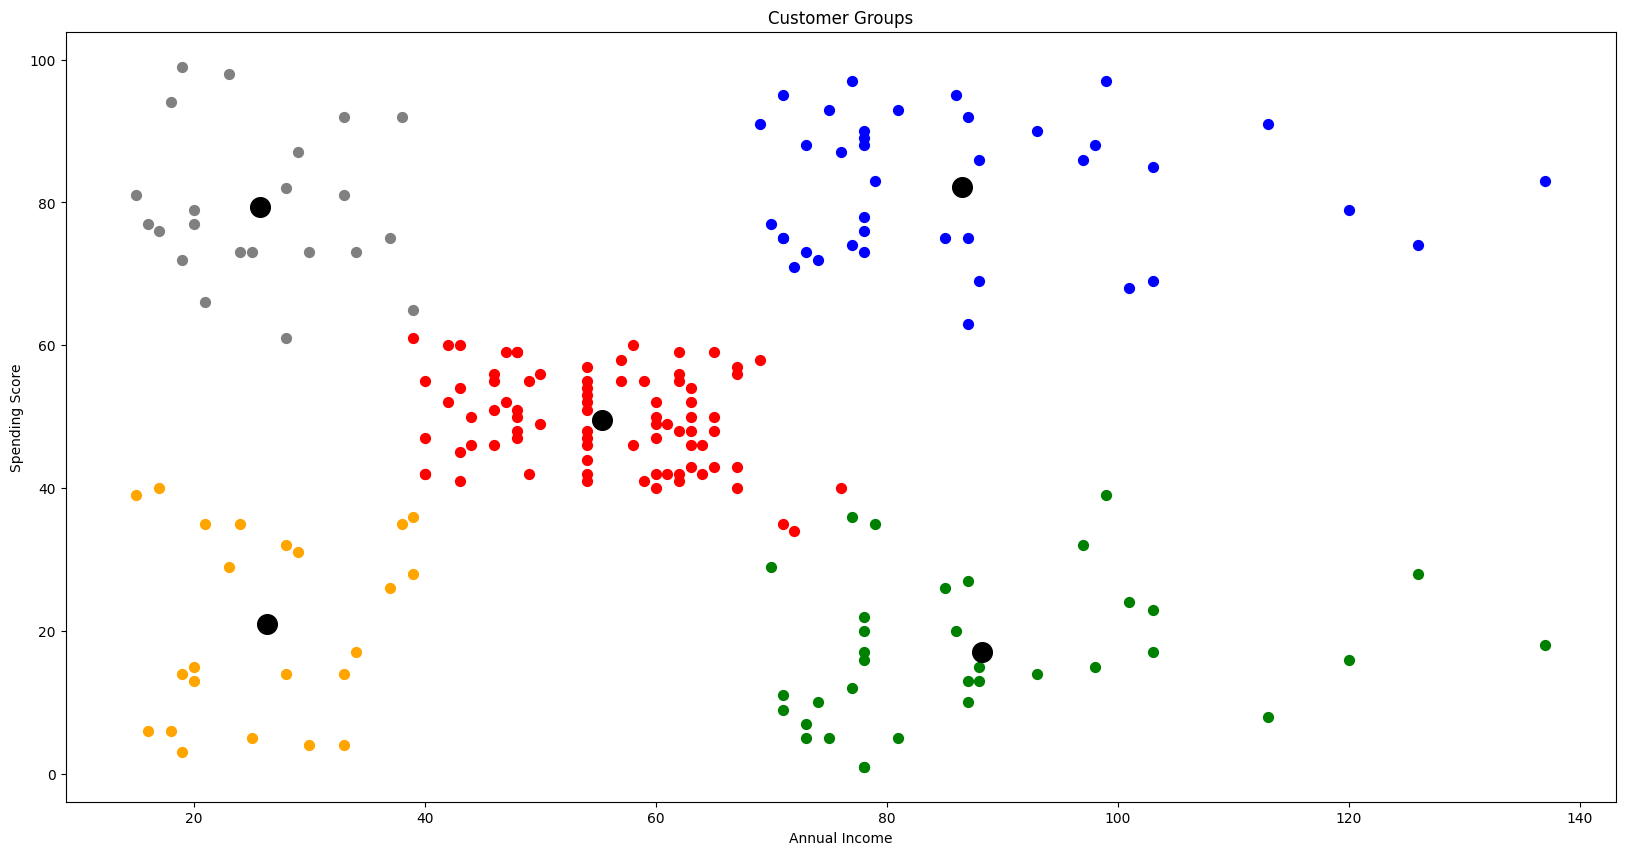

In [64]:
plt.figure(figsize=(20,10))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50 , c="red", label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50 , c="blue", label='Cluster 1')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50 , c="green", label='Cluster 1')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50 , c="orange", label='Cluster 1')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50 , c="grey", label='Cluster 1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, c="black")
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()